In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
colors = ["#8c0404","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

/tmp/ipykernel_4817/725513737.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("spotify-2023.csv",encoding = 'latin-1')

In [3]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [4]:
df.shape

(953, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [7]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [8]:
df.duplicated(subset=['streams'])

0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Length: 953, dtype: bool

In [9]:
print(df["artist(s)_name"].nunique())

645


In [10]:
artist_counts = df["artist(s)_name"].value_counts()
print(artist_counts)

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64


In [11]:
iplot(px.bar(artist_counts[:15],
             text_auto = True,
             color = artist_counts[:15].index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value="Count"),
             title = 'Top 15 Artists with Most Songs'
            ))

/home/nikhilagarwal/.local/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [12]:
num = df.select_dtypes(include=['float64','int64'])

                      artist_count  released_year  released_month  \
artist_count              1.000000       0.087586        0.037995   
released_year             0.087586       1.000000        0.076714   
released_month            0.037995       0.076714        1.000000   
released_day             -0.017549       0.174282        0.080313   
in_spotify_playlists     -0.101966      -0.392204       -0.104757   
in_spotify_charts        -0.018507       0.069678       -0.047623   
in_apple_playlists       -0.051074      -0.198998       -0.000164   
in_apple_charts          -0.088597      -0.035842       -0.019064   
in_deezer_charts         -0.003732       0.095389       -0.005286   
bpm                      -0.038375      -0.005334       -0.039252   
danceability_%            0.207027       0.187333       -0.046403   
valence_%                 0.127960      -0.059355       -0.118571   
energy_%                  0.137096       0.095226       -0.083710   
acousticness_%           -0.101061

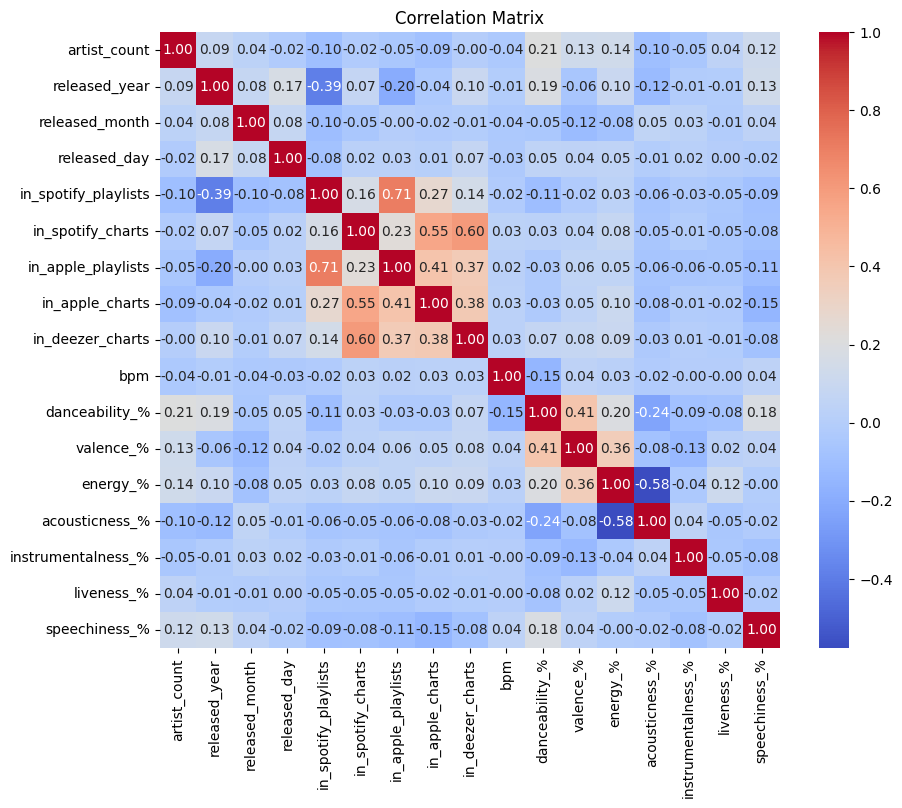

In [13]:
correlation = num.corr()
print(correlation)
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

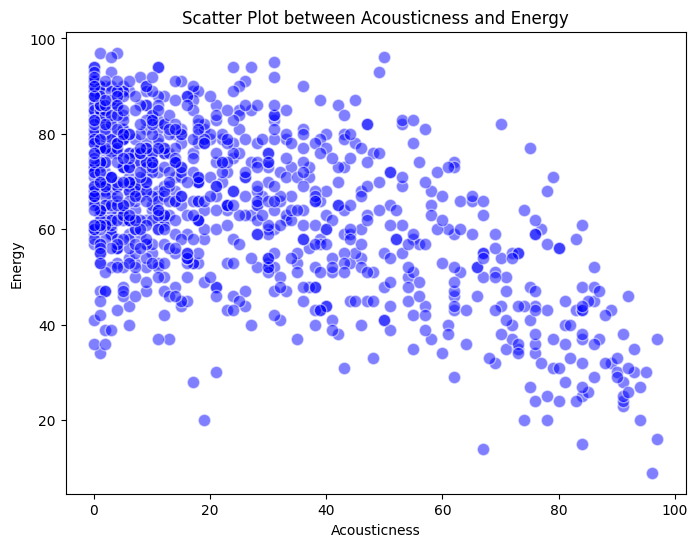

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df['acousticness_%'],df['energy_%'],color = 'blue',alpha=0.5,edgecolors='w',s=80)
plt.title("Scatter Plot between Acousticness and Energy")
plt.xlabel("Acousticness")
plt.ylabel("Energy")
plt.show

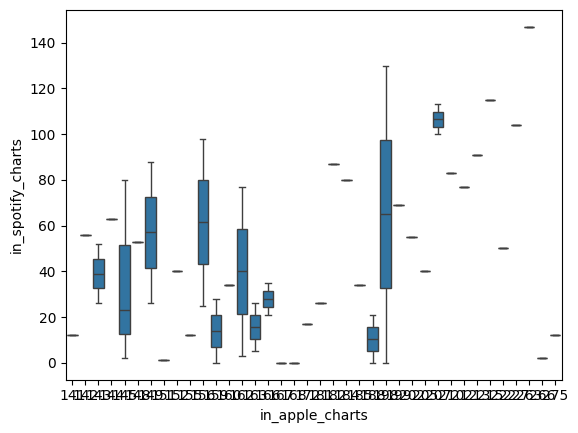

In [15]:
top_15_df = df.nlargest(50, 'in_apple_charts')

sns.boxplot(data=top_15_df, x='in_apple_charts', y='in_spotify_charts')
plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [17]:
df['mode']

0      Major
1      Major
2      Major
3      Major
4      Minor
       ...  
948    Major
949    Major
950    Major
951    Major
952    Minor
Name: mode, Length: 953, dtype: object

In [18]:
df['artist_count']

0      2
1      1
2      1
3      1
4      1
      ..
948    1
949    1
950    2
951    3
952    1
Name: artist_count, Length: 953, dtype: int64

In [20]:
df['streams']

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: object

In [23]:
df.head(15)
df1 = df.head(20)

In [24]:
df1.head(20)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [25]:
df1['artist(s)_name'].count()

20